In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

# Task 1

(1024, 1)
(1024, 1)


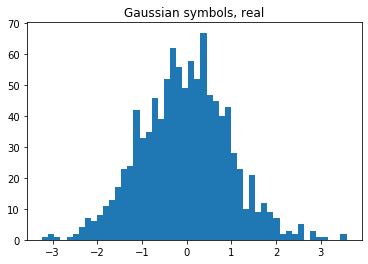

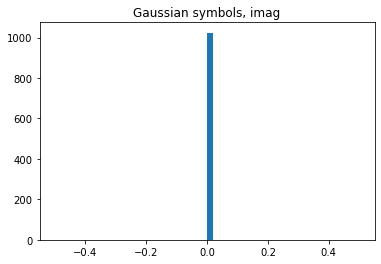

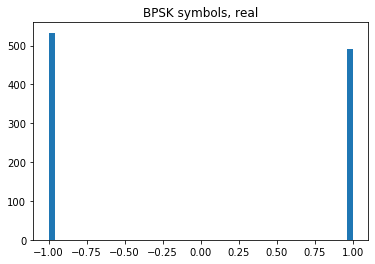

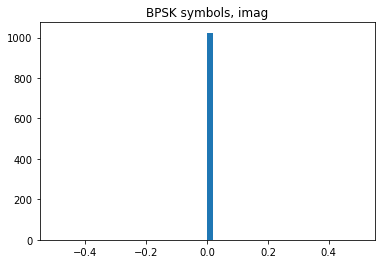

In [20]:
def loadFile (filename):
    return scipy.io.loadmat('data/' + filename + '.mat')[filename]
gauss = loadFile('T1_data_Sk_Gaussian')
bpsk = loadFile('T1_data_Sk_BPSK').T
print(bpsk.shape)
print(gauss.shape)

s_gauss = np.fft.ifft(gauss)
s_bpsk = np.fft.ifft(bpsk)

plt.title("Gaussian symbols, real")
plt.hist(np.real(s_gauss),50)
plt.show()
plt.title("Gaussian symbols, imag")
plt.hist(np.imag(s_gauss),50)
plt.show()
plt.title("BPSK symbols, real")
plt.hist(np.real(s_bpsk),50)
plt.show()
plt.title("BPSK symbols, imag")
plt.hist(np.imag(s_bpsk),50)
plt.show()


In [19]:
pow_gauss = np.mean(np.real(s_gauss)*np.imag(s_gauss))
pow_bpsk = np.mean(np.real(s_bpsk)*np.imag(s_bpsk))
mean_gauss = np.mean(np.real(s_gauss) + np.imag(s_gauss))
mean_bpsk = np.mean(np.real(s_bpsk)+ np.imag(s_bpsk))

print(mean_bpsk, mean_gauss, pow_bpsk, pow_gauss)


-0.041015625 -0.0331319941354531 0.0 0.0


It seems like the imaginary component of s(n) is 0.

The pdf of the gaussian symbols is the same as the symbol.




# Task 3

In [24]:
x_H0 = loadFile('T3_data_x_H0')
x_H1 = loadFile('T3_data_x_H1')
print(bpsk.shape)
print(gauss.shape)
x_r_H0 = np.real(x_H0[0])
x_i_H0 = np.imag(x_H0[0])
x_r_H1 = np.real(x_H1[0])
x_i_H1 = np.imag(x_H1[0])
print(x_r_H0, x_i_H0, x_r_H1, x_i_H1)

(1024, 1)
(1024, 1)
[-0.48562193] [1.54463211] [-1.54584574] [1.54463211]
